In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf

batch_size = 64
train_datagen = ImageDataGenerator(featurewise_center=True,
                                  rescale = 1/255.0,
                                  rotation_range=15,
                                  brightness_range=(0.1,0.9),
                                  #zoom_range=0.4
                                  )

val_datagen = ImageDataGenerator(rescale = 1/255.0)

train_gen =  train_datagen.flow_from_directory("../data/train",
                                               target_size = (50,50),
                                               color_mode = "grayscale",
                                               class_mode = "categorical",
                                               batch_size = 128)
val_gen = val_datagen.flow_from_directory("../data/validation",
                                          target_size = (50,50),
                                          color_mode = "grayscale",
                                          class_mode = "categorical",
                                          batch_size = 128)

Found 3873 images belonging to 4 classes.
Found 1958 images belonging to 4 classes.


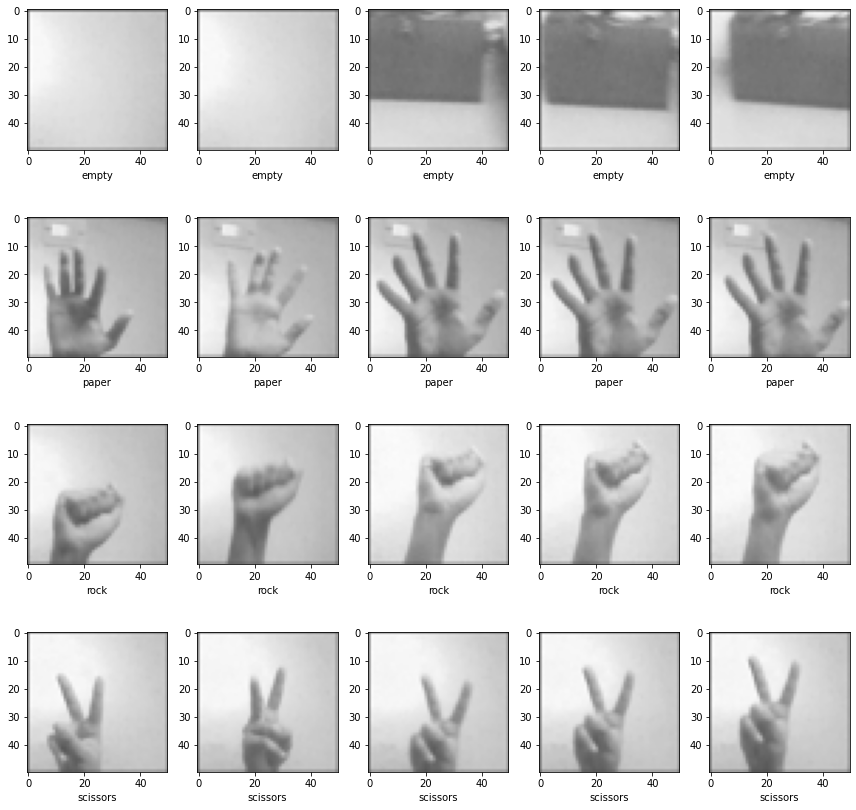

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 50

# input path for the images
base_path = "../data/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.xlabel(expression)
        plt.imshow(img, cmap="gray")

plt.tight_layout()

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), padding="same", activation="relu", input_shape=(50,50,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.54))

model.add(keras.layers.Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.7))

model.add(keras.layers.Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.7))

model.add(keras.layers.Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.6))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.64))

model.add(keras.layers.Dense(4, activation="softmax"))
optimizer = keras.optimizers.Adam(lr =0.001)
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath="model/model2/weight_checkpoints/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit_generator(train_gen,
                   epochs=100,
                   validation_data = val_gen,
                   steps_per_epoch=train_gen.n//train_gen.batch_size,
                   validation_steps=val_gen.n//val_gen.batch_size,
                   callbacks = callbacks_list)

c:\users\home\appdata\local\programs\python\python38\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
30/30 [==============================] - ETA: 0s - loss: 0.8213 - accuracy: 0.6740
Epoch 00001: val_accuracy improved from -inf to 0.61094, saving model to model/model2/weight_checkpoints\weights-improvement-01-0.61.hdf5
30/30 [==============================] - 16s 521ms/step - loss: 0.8213 - accuracy: 0.6740 - val_loss: 0.9812 - val_accuracy: 0.6109
Epoch 2/100
30/30 [==============================] - ETA: 0s - loss: 0.8195 - accuracy: 0.6662
Epoch 00002: val_accuracy improved from 0.61094 to 0.67917, saving model to model/model2/weight_checkpoints\weights-improvement-02-0.68.hdf5
30/30 [==============================] - 15s 506ms/step - loss: 0.8195 - accuracy: 0.6662 - val_loss: 0.8494 - val_accuracy: 0.6792
Epoch 3/100
30/30 [==============================] - ETA: 0s - loss: 0.7746 - accuracy: 0.6913
Epoch 00003: val_accuracy did not improve from 0.67917
30/30 [==============================] - 16s 528ms/step - loss: 0.7746 - accuracy: 0.6913 - val_loss: 0.8608 - val_ac

Epoch 28/100
30/30 [==============================] - ETA: 0s - loss: 0.5295 - accuracy: 0.8131
Epoch 00028: val_accuracy did not improve from 0.76823
30/30 [==============================] - 16s 537ms/step - loss: 0.5295 - accuracy: 0.8131 - val_loss: 0.8800 - val_accuracy: 0.5599
Epoch 29/100
30/30 [==============================] - ETA: 0s - loss: 0.5277 - accuracy: 0.8128
Epoch 00029: val_accuracy did not improve from 0.76823
30/30 [==============================] - 17s 572ms/step - loss: 0.5277 - accuracy: 0.8128 - val_loss: 0.7799 - val_accuracy: 0.7057
Epoch 30/100
30/30 [==============================] - ETA: 0s - loss: 0.5192 - accuracy: 0.8107
Epoch 00030: val_accuracy did not improve from 0.76823
30/30 [==============================] - 17s 559ms/step - loss: 0.5192 - accuracy: 0.8107 - val_loss: 0.6740 - val_accuracy: 0.7354
Epoch 31/100
30/30 [==============================] - ETA: 0s - loss: 0.5032 - accuracy: 0.8190
Epoch 00031: val_accuracy did not improve from 0.76823


Epoch 57/100
30/30 [==============================] - ETA: 0s - loss: 0.3942 - accuracy: 0.8700
Epoch 00057: val_accuracy improved from 0.77083 to 0.77969, saving model to model/model2/weight_checkpoints\weights-improvement-57-0.78.hdf5
30/30 [==============================] - 15s 494ms/step - loss: 0.3942 - accuracy: 0.8700 - val_loss: 0.6067 - val_accuracy: 0.7797
Epoch 58/100
30/30 [==============================] - ETA: 0s - loss: 0.3725 - accuracy: 0.8742
Epoch 00058: val_accuracy did not improve from 0.77969
30/30 [==============================] - 17s 553ms/step - loss: 0.3725 - accuracy: 0.8742 - val_loss: 0.6376 - val_accuracy: 0.7599
Epoch 59/100
30/30 [==============================] - ETA: 0s - loss: 0.3839 - accuracy: 0.8684
Epoch 00059: val_accuracy did not improve from 0.77969
30/30 [==============================] - 16s 517ms/step - loss: 0.3839 - accuracy: 0.8684 - val_loss: 0.6457 - val_accuracy: 0.7641
Epoch 60/100
30/30 [==============================] - ETA: 0s - l

30/30 [==============================] - ETA: 0s - loss: 0.2983 - accuracy: 0.9028
Epoch 00085: val_accuracy improved from 0.79375 to 0.79792, saving model to model/model2/weight_checkpoints\weights-improvement-85-0.80.hdf5
30/30 [==============================] - 16s 540ms/step - loss: 0.2983 - accuracy: 0.9028 - val_loss: 0.5447 - val_accuracy: 0.7979
Epoch 86/100
30/30 [==============================] - ETA: 0s - loss: 0.2718 - accuracy: 0.9071
Epoch 00086: val_accuracy improved from 0.79792 to 0.79844, saving model to model/model2/weight_checkpoints\weights-improvement-86-0.80.hdf5
30/30 [==============================] - 15s 509ms/step - loss: 0.2718 - accuracy: 0.9071 - val_loss: 0.5087 - val_accuracy: 0.7984
Epoch 87/100
30/30 [==============================] - ETA: 0s - loss: 0.2689 - accuracy: 0.9154
Epoch 00087: val_accuracy did not improve from 0.79844
30/30 [==============================] - 16s 528ms/step - loss: 0.2689 - accuracy: 0.9154 - val_loss: 0.6788 - val_accuracy:

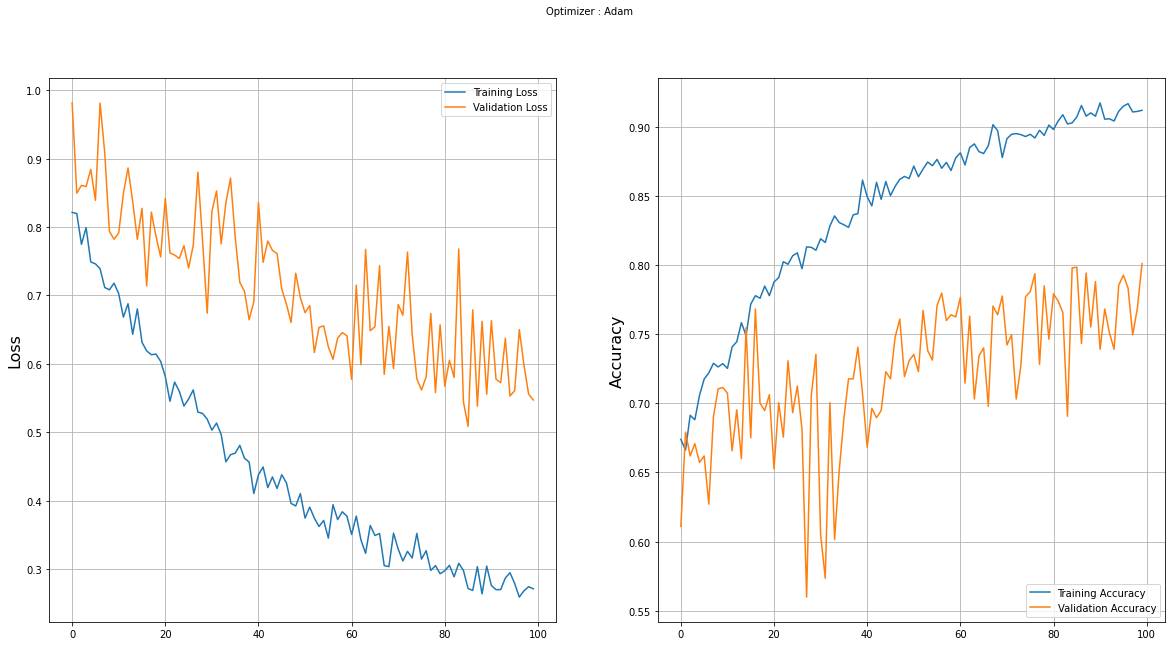

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.grid()
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [46]:
model_json= model.to_json()
with open("model2/model2.json","w") as json_file:
    json_file.write(model_json)
print('model saved')

model saved


In [48]:
model.save_weights("model2/best_weights.h5")